In [1]:
import numpy as np 
import pandas as pd
import os
from sklearn.model_selection import train_test_split 
from keras.preprocessing.image import ImageDataGenerator
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy
import tensorflow as tf
import matplotlib.pyplot as plt

# Загрузка тренировочных данных

Необходимо написать загрузчик данных. **Фотографии и label к ним находятся в разных папках.** Сначала рассмотрим набор фотографий

In [2]:
sorted(os.listdir(r'C:\Users\alex\Project\ЯП Компьютерное зрение\fruits_data\train'))

['Image_1.jpg',
 'Image_10.jpg',
 'Image_100.jpg',
 'Image_1000.jpg',
 'Image_10000.jpg',
 'Image_10001.jpg',
 'Image_10002.jpg',
 'Image_10003.jpg',
 'Image_10004.jpg',
 'Image_10005.jpg',
 'Image_10006.jpg',
 'Image_10007.jpg',
 'Image_10008.jpg',
 'Image_10009.jpg',
 'Image_1001.jpg',
 'Image_10010.jpg',
 'Image_10011.jpg',
 'Image_10012.jpg',
 'Image_10013.jpg',
 'Image_10014.jpg',
 'Image_10015.jpg',
 'Image_10016.jpg',
 'Image_10017.jpg',
 'Image_10018.jpg',
 'Image_10019.jpg',
 'Image_1002.jpg',
 'Image_10020.jpg',
 'Image_10021.jpg',
 'Image_10022.jpg',
 'Image_10023.jpg',
 'Image_10024.jpg',
 'Image_10025.jpg',
 'Image_10026.jpg',
 'Image_10027.jpg',
 'Image_10028.jpg',
 'Image_10029.jpg',
 'Image_1003.jpg',
 'Image_10030.jpg',
 'Image_10031.jpg',
 'Image_10032.jpg',
 'Image_10033.jpg',
 'Image_10034.jpg',
 'Image_10035.jpg',
 'Image_10036.jpg',
 'Image_10037.jpg',
 'Image_10038.jpg',
 'Image_10039.jpg',
 'Image_1004.jpg',
 'Image_10040.jpg',
 'Image_10041.jpg',
 'Image_10042.

Создадим объект Series, содержащий фотографии

In [3]:
file_list = pd.Series(sorted(os.listdir(r'C:\Users\alex\Project\ЯП Компьютерное зрение\fruits_data\train\\')), name='file_name')
file_list

0            Image_1.jpg
1           Image_10.jpg
2          Image_100.jpg
3         Image_1000.jpg
4        Image_10000.jpg
              ...       
47379     Image_9995.jpg
47380     Image_9996.jpg
47381     Image_9997.jpg
47382     Image_9998.jpg
47383     Image_9999.jpg
Name: file_name, Length: 47384, dtype: object

Создадим объект Series, содержащий пути к этим фотографиям

In [4]:
filepaths = pd.Series([r'C:\Users\alex\Project\ЯП Компьютерное зрение\fruits_data\train\\' + str(i) for i in file_list], name='filepaths')
filepaths

0        C:\Users\alex\Project\ЯП Компьютерное зрение\f...
1        C:\Users\alex\Project\ЯП Компьютерное зрение\f...
2        C:\Users\alex\Project\ЯП Компьютерное зрение\f...
3        C:\Users\alex\Project\ЯП Компьютерное зрение\f...
4        C:\Users\alex\Project\ЯП Компьютерное зрение\f...
                               ...                        
47379    C:\Users\alex\Project\ЯП Компьютерное зрение\f...
47380    C:\Users\alex\Project\ЯП Компьютерное зрение\f...
47381    C:\Users\alex\Project\ЯП Компьютерное зрение\f...
47382    C:\Users\alex\Project\ЯП Компьютерное зрение\f...
47383    C:\Users\alex\Project\ЯП Компьютерное зрение\f...
Name: filepaths, Length: 47384, dtype: object

Объединим их

In [5]:
train_img_df = pd.merge(filepaths, file_list, right_index = True, left_index = True)
train_img_df

,filepaths,file_name
0,C:\Users\alex\Project\ЯП Компьютерное зрение\f...,Image_1.jpg
1,C:\Users\alex\Project\ЯП Компьютерное зрение\f...,Image_10.jpg
2,C:\Users\alex\Project\ЯП Компьютерное зрение\f...,Image_100.jpg
3,C:\Users\alex\Project\ЯП Компьютерное зрение\f...,Image_1000.jpg
4,C:\Users\alex\Project\ЯП Компьютерное зрение\f...,Image_10000.jpg
...,...,...
47379,C:\Users\alex\Project\ЯП Компьютерное зрение\f...,Image_9995.jpg
47380,C:\Users\alex\Project\ЯП Компьютерное зрение\f...,Image_9996.jpg
47381,C:\Users\alex\Project\ЯП Компьютерное зрение\f...,Image_9997.jpg
47382,C:\Users\alex\Project\ЯП Компьютерное зрение\f...,Image_9998.jpg


**Определим метки классов для изображения:**

In [6]:
train_label_df = pd.read_csv('Training_set.csv')
train_label_df

,filename,label
0,Image_1.jpg,Pear 2
1,Image_2.jpg,Tomato Heart
2,Image_3.jpg,Plum 3
3,Image_4.jpg,Pear Stone
4,Image_5.jpg,Cherry 2
...,...,...
47379,Image_47380.jpg,Grape Pink
47380,Image_47381.jpg,Melon Piel de Sapo
47381,Image_47382.jpg,Grape White 3
47382,Image_47383.jpg,Avocado


**Объединим метки и фотографии**

In [7]:
train_df = pd.merge(train_img_df, train_label_df, how='inner', right_on='filename',
        left_on='file_name')


Удалим ненужные столбцы

In [8]:
train_df = train_df.drop(['file_name', 'filename'], axis=1)

**Отлично, теперь имеем удобную структуру - путь к файлу - метка**

In [9]:
train_df

,filepaths,label
0,C:\Users\alex\Project\ЯП Компьютерное зрение\f...,Pear 2
1,C:\Users\alex\Project\ЯП Компьютерное зрение\f...,Tangelo
2,C:\Users\alex\Project\ЯП Компьютерное зрение\f...,Tomato 3
3,C:\Users\alex\Project\ЯП Компьютерное зрение\f...,Cherry Wax Red
4,C:\Users\alex\Project\ЯП Компьютерное зрение\f...,Grape White 3
...,...,...
47379,C:\Users\alex\Project\ЯП Компьютерное зрение\f...,Apple Red Delicious
47380,C:\Users\alex\Project\ЯП Компьютерное зрение\f...,Apple Golden 3
47381,C:\Users\alex\Project\ЯП Компьютерное зрение\f...,Onion Red
47382,C:\Users\alex\Project\ЯП Компьютерное зрение\f...,Pineapple Mini


# Проверка загруженных данных

**Проверим изображение и метки на кррректность**

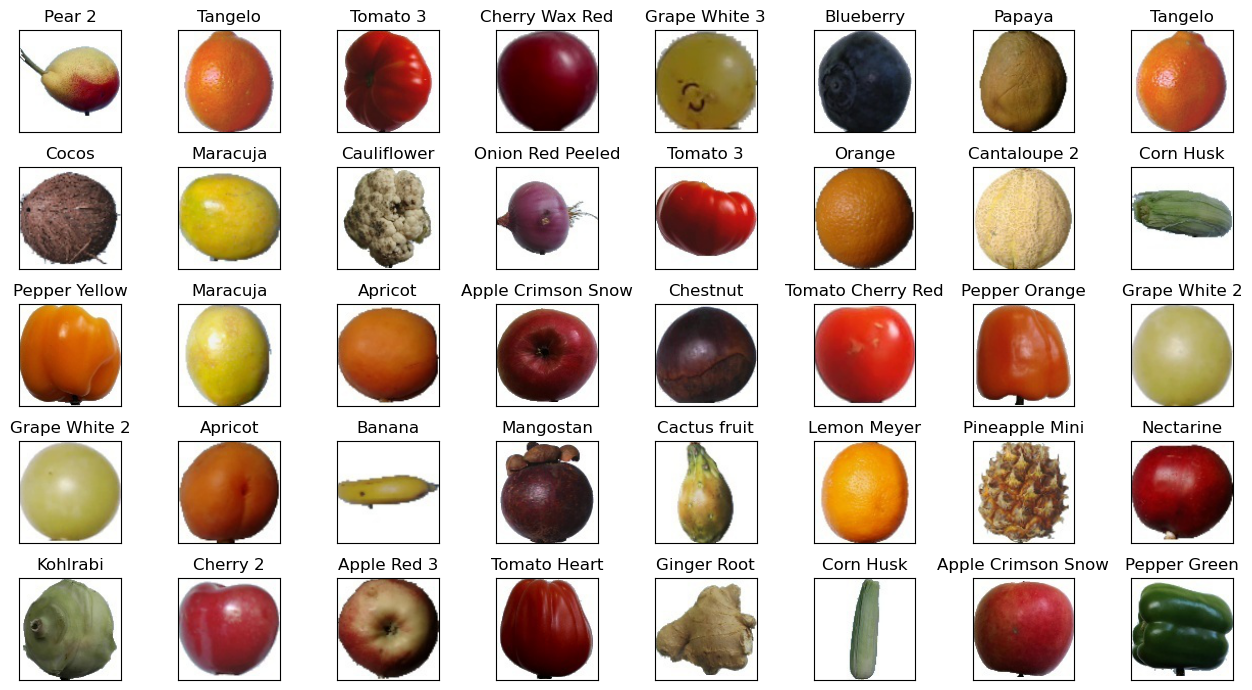

In [10]:
f, a = plt.subplots(nrows=5, ncols=8, figsize=(13, 7), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(a.flat):
    ax.imshow(plt.imread(train_df['filepaths'][i]))
    ax.set_title(train_df['label'][i])
plt.tight_layout() # отсутпы между изображениями

**Рассмотрим количество каждого фрукта в обучающей выборке**. **У нас 131 метка, значит на последнем слоем будет 131 нейрон.**

In [11]:
train_df[['label']].value_counts(ascending=False)

label         
Grape Blue        689
Plum 3            630
Cherry Rainier    517
Tomato 3          517
Peach 2           517
                 ... 
Cucumber Ripe     275
Tomato Maroon     257
Pear Kaiser       210
Mangostan         210
Ginger Root       208
Length: 131, dtype: int64

# Разделение на train и validation

**Разобьем на выборки наш датасет. Обязательно применяем стратификацию для сохранения пропорций классов в выборка**

In [12]:
train, val = train_test_split(train_df, test_size=0.15,
                             stratify=train_df['label'])

In [13]:
print(f'Размерность train : ', train.shape)
print(f'Размерность val : ', val.shape)

Размерность train :  (40276, 2)
Размерность val :  (7108, 2)


# ImageDataGenerator + Augmentation

In [14]:
img_datagen = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet_v2.preprocess_input)

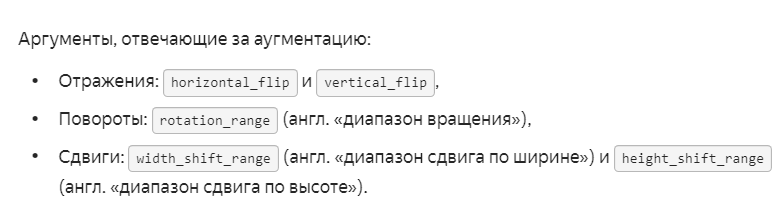

In [27]:
# входной размер изображения
img_size = (224, 224)

**Создаю загрзучики данных из датафреймов.**

In [16]:
train_flow = img_datagen.flow_from_dataframe(dataframe=train,
                                            x_col='filepaths',
                                            y_col='label',
                                            target_size=img_size,
                                            color_mode='rgb',
                                            class_mode='categorical',
                                            batch_size=64,
                                            seed=42)

Found 40276 validated image filenames belonging to 131 classes.


In [17]:
val_flow = img_datagen.flow_from_dataframe(dataframe=val,
                                            x_col='filepaths',
                                            y_col='label',
                                            target_size=img_size,
                                            color_mode='rgb',
                                            class_mode='categorical',
                                            batch_size=64,
                                            seed=42)

Found 7108 validated image filenames belonging to 131 classes.


# Архитектура

Строим сверточную нейронную сеть

In [18]:
model = keras.Sequential()
model.add(Conv2D(filters=32, kernel_size=5,
                 input_shape=[224, 224, 3],
                padding='same',
                activation='relu'))

model.add(MaxPooling2D(pool_size=3))

model.add(Conv2D(filters=64, kernel_size=4, activation='relu',
                padding='same'))

model.add(MaxPooling2D(pool_size=3))

model.add(Conv2D(filters=128, kernel_size=4, activation='relu',
                padding='same'))

model.add(MaxPooling2D(pool_size=2))

model.add(Flatten())

model.add(Dense(units=256, activation='relu'))

model.add(Dense(units=131, activation='softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 74, 74, 64)        32832     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 24, 24, 128)       131200    
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 128)      0

In [19]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=["accuracy"])

In [20]:
Callback = tf.keras.callbacks.EarlyStopping(monitor='accuracy', patience=3)

# Обучение

In [21]:
model_fit = model.fit(train_flow,
                      validation_data = val_flow, 
                      epochs = 5, callbacks=Callback)

Epoch 1/5
630/630 [==============================] - 940s 1s/step - loss: 0.5832 - accuracy: 0.8582 - val_loss: 0.0389 - val_accuracy: 0.9894
Epoch 2/5
630/630 [==============================] - 924s 1s/step - loss: 0.0453 - accuracy: 0.9876 - val_loss: 0.0410 - val_accuracy: 0.9849
Epoch 3/5
630/630 [==============================] - 924s 1s/step - loss: 0.0059 - accuracy: 0.9980 - val_loss: 0.0298 - val_accuracy: 0.9914
Epoch 4/5
630/630 [==============================] - 923s 1s/step - loss: 0.0522 - accuracy: 0.9859 - val_loss: 0.0049 - val_accuracy: 0.9987
Epoch 5/5
630/630 [==============================] - 923s 1s/step - loss: 0.0094 - accuracy: 0.9974 - val_loss: 3.2010e-04 - val_accuracy: 1.0000


In [22]:
features, target = next(train_flow)
features.shape

(64, 224, 224, 3)

Получились признаки — четырёхмерный тензор, в котором 16 изображений размером 224x224 с тремя цветовыми каналами.


In [23]:
target.shape

(64, 131)

In [24]:
target

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Получение индекса классов

In [25]:
train_flow.class_indices

{'Apple Braeburn': 0,
 'Apple Crimson Snow': 1,
 'Apple Golden 1': 2,
 'Apple Golden 2': 3,
 'Apple Golden 3': 4,
 'Apple Granny Smith': 5,
 'Apple Pink Lady': 6,
 'Apple Red 1': 7,
 'Apple Red 2': 8,
 'Apple Red 3': 9,
 'Apple Red Delicious': 10,
 'Apple Red Yellow 1': 11,
 'Apple Red Yellow 2': 12,
 'Apricot': 13,
 'Avocado': 14,
 'Avocado ripe': 15,
 'Banana': 16,
 'Banana Lady Finger': 17,
 'Banana Red': 18,
 'Beetroot': 19,
 'Blueberry': 20,
 'Cactus fruit': 21,
 'Cantaloupe 1': 22,
 'Cantaloupe 2': 23,
 'Carambula': 24,
 'Cauliflower': 25,
 'Cherry 1': 26,
 'Cherry 2': 27,
 'Cherry Rainier': 28,
 'Cherry Wax Black': 29,
 'Cherry Wax Red': 30,
 'Cherry Wax Yellow': 31,
 'Chestnut': 32,
 'Clementine': 33,
 'Cocos': 34,
 'Corn': 35,
 'Corn Husk': 36,
 'Cucumber Ripe': 37,
 'Cucumber Ripe 2': 38,
 'Dates': 39,
 'Eggplant': 40,
 'Fig': 41,
 'Ginger Root': 42,
 'Granadilla': 43,
 'Grape Blue': 44,
 'Grape Pink': 45,
 'Grape White': 46,
 'Grape White 2': 47,
 'Grape White 3': 48,
 'Grap

**Посмотрим график ошибок модели на выборках**

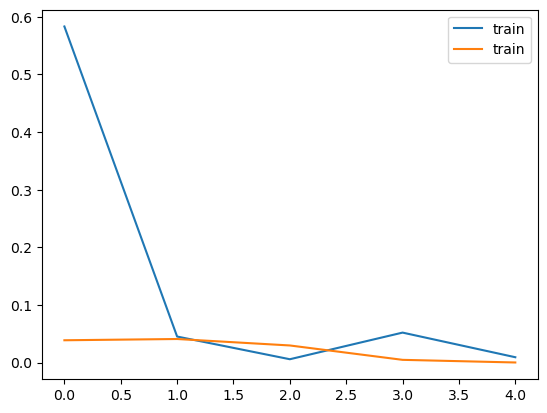

In [26]:
plt.plot(model_fit.history['loss'], label='train')
plt.plot(model_fit.history['val_loss'], label='train')
plt.legend()


# Вывод

**Мне удалось построить архитектуру CNN, позволяющую классифицировать 131 класс фруктов овощей, с accuracy на validation > 99%**